In [1]:
#installs
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
! pip install -U textblob
! python -m textblob.download_corpora
!pip install pandas
!pip install wordcloud
!pip install plotly==5.3.1

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-8j7_cyez
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-8j7_cyez
[nltk_data] Downloading package brown to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/b

In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import os

#Data Preprocessing and Feature Engineering
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
import string

import re
import nltk
from bs4 import BeautifulSoup
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as pex

import urllib
import requests

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
pd.set_option("display.max_colwidth", -1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-2-925d8c1fc7f6>:40: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
tweet_count = 10000
text_query = "COVID-19 vaccine"
since_date = "2020-01-01"
until_date = "2021-08-31"

In [5]:
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))

0

In [6]:
tweets_df= pd.read_json('text-query-tweets.json', lines=True)
tweets_df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/goodtro73247053/status/1432493272904224775,2021-08-30 23:59:45+00:00,"@RepRonnyJackson @GOPLeader @RepChrisStewart I love republicans who put out misinformation on covid -19 then push animal dewarmer for there constituents to take, try anything they say.other than the vaccine😁","@RepRonnyJackson @GOPLeader @RepChrisStewart I love republicans who put out misinformation on covid -19 then push animal dewarmer for there constituents to take, try anything they say.other than the vaccine😁",1432493272904224775,"{'_type': 'snscrape.modules.twitter.User', 'username': 'goodtro73247053', 'id': 1354981815036080129, 'displayname': '@goodtrouble', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2021-01-29T02:38:43+00:00', 'followersCount': 5, 'friendsCount': 32, 'statusesCount': 319, 'favouritesCount': 293, 'listedCount': 0, 'mediaCount': 1, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1354982918700093440/bVZD6D7Q_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/goodtro73247053'}",0,0,0,...,None,NaN,None,1.432486e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'RepRonnyJackson', 'id': 1341903465610686464, 'displayname': 'Ronny Jackson', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RepRonnyJackson'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'RepRonnyJackson', 'id': 1341903465610686464, 'displayname': 'Ronny Jackson', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RepRonnyJackson'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'GOPLeader', 'id': 19739126, 'displayname': 'Kevin McCarthy', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/GOPLeader'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'RepChrisStewart', 'id': 1072008757, 'displayname': 'Rep. Chris Stewart', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RepChrisStewart'}]",None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/WashTimes/status/1432493267132768256,2021-08-30 23:59:43+00:00,Detroit Zoo animals given COVID-19 vaccine https://t.co/39j5AX3tsp https://t.co/4cRo6HfCqL,Detroit Zoo animals given COVID-19 vaccine washingtontimes.com/news/2021/aug/… https://t.co/4cRo6HfCqL,143249326713

In [7]:
tweets_df.shape

(10000, 28)

In [8]:
tweets_df.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,inReplyToTweetId
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,0.0,1.777000e+03
mean,1.432349e+18,1.525400,3.308600,9.330400,0.472400,1.431210e+18,NaN,1.431945e+18
std,8.811810e+13,14.130673,32.445407,77.148103,4.677267,2.102957e+16,NaN,3.815342e+15
min,1.432164e+18,0.000000,0.000000,0.000000,0.000000,8.510359e+17,NaN,1.324679e+18
25%,1.432286e+18,0.000000,0.000000,0.000000,0.000000,1.432259e+18,NaN,1.432182e+18
50%,1.432359e+18,0.000000,0.000000,0.000000,0.000000,1.432349e+18,NaN,1.432325e+18
75%,1.432421e+18,1.000000,1.000000,2.000000,0.000000,1.432413e+18,NaN,1.432393e+18
max,1.432493e+18,926.000000,1997.000000,4053.000000,187.000000,1.432493e+18,NaN,1.432491e+18


In [9]:
#as the data is coming from a web scrape, we would like to remove html using beautiful soup
#this below block of code is written to remove html

def remove_html(content):
    soup=BeautifulSoup(content,'lxml')
    html_free=soup.get_text()
    return html_free

In [10]:
def remove_pattern(content, pattern):
    r = re.findall(pattern, content)
    for i in r:
        content = re.sub(i, "", content)
    return content

In [11]:
tweets_df['content'] = np.vectorize(remove_pattern)(tweets_df['content'], "@[\w]*")
tweets_df['content'] = np.vectorize(remove_pattern)(tweets_df['content'], "#[\w]*")
tweets_df['content'] = np.vectorize(remove_pattern)(tweets_df['content'], '[0-9]')
tweets_df['content'] = tweets_df['content'].str.replace("[^a-zA-Z#]", " ")
tweets_df['content'] = tweets_df['content'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 3]))

<ipython-input-11-0e0479d11138>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['content'] = tweets_df['content'].str.replace("[^a-zA-Z#]", " ")


In [12]:
tweets_df['content']

0       love republicans misinformation covid then push animal dewarmer there constituents take anything they other than vaccine                                                                                                          
1       Detroit animals given COVID vaccine https jAXtsp https cRoHfCqL                                                                                                                                                                   
2       Natural immunity offers exponentially more protection than COVID vaccines https MaarVYeZW                                                                                                                                         
3       Some expert somewhere will exact opposite this give https wNdQEkAP newly published medical study found that infection from COVID confers considerably longer lasting stronger protection against Delta variant virus than vaccines
4       COVID variant detected South Africa evade vaccine pr

In [13]:
tweet_content_df = tweets_df['content'].apply(lambda x: x.split())
tweet_content_df

0       [love, republicans, misinformation, covid, then, push, animal, dewarmer, there, constituents, take, anything, they, other, than, vaccine]                                                                                                                         
1       [Detroit, animals, given, COVID, vaccine, https, jAXtsp, https, cRoHfCqL]                                                                                                                                                                                         
2       [Natural, immunity, offers, exponentially, more, protection, than, COVID, vaccines, https, MaarVYeZW]                                                                                                                                                             
3       [Some, expert, somewhere, will, exact, opposite, this, give, https, wNdQEkAP, newly, published, medical, study, found, that, infection, from, COVID, confers, considerably, longer, lasting, st

In [14]:
tweet_content_df.describe()

count     10000                                                                                                                                                                                                    
unique    9830                                                                                                                                                                                                     
top       [COVID, means, that, nearly, million, Africans, could, fall, into, extreme, poverty, Will, commit, spend, purchasing, COVID, vaccines, boosting, recovery, efforts, across, continent, None, safe, until]
freq      45                                                                                                                                                                                                       
Name: content, dtype: object

In [15]:
ps = PorterStemmer()
tweet_content_df = tweet_content_df.apply(lambda x: [ps.stem(i) for i in x])
tweet_content_df.head()

0    [love, republican, misinform, covid, then, push, anim, dewarm, there, constitu, take, anyth, they, other, than, vaccin]                                                                                                                  
1    [detroit, anim, given, covid, vaccin, http, jaxtsp, http, crohfcql]                                                                                                                                                                      
2    [natur, immun, offer, exponenti, more, protect, than, covid, vaccin, http, maarvyezw]                                                                                                                                                    
3    [some, expert, somewher, will, exact, opposit, thi, give, http, wndqekap, newli, publish, medic, studi, found, that, infect, from, covid, confer, consider, longer, last, stronger, protect, against, delta, variant, viru, than, vaccin]
4    [covid, variant, detect, south, africa,

In [16]:
for i in range(len(tweet_content_df)):
    tweet_content_df[i] = ' '.join(tweet_content_df[i])
tweets_df['content'] = tweet_content_df
tweets_df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/goodtro73247053/status/1432493272904224775,2021-08-30 23:59:45+00:00,love republican misinform covid then push anim dewarm there constitu take anyth they other than vaccin,"@RepRonnyJackson @GOPLeader @RepChrisStewart I love republicans who put out misinformation on covid -19 then push animal dewarmer for there constituents to take, try anything they say.other than the vaccine😁",1432493272904224775,"{'_type': 'snscrape.modules.twitter.User', 'username': 'goodtro73247053', 'id': 1354981815036080129, 'displayname': '@goodtrouble', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2021-01-29T02:38:43+00:00', 'followersCount': 5, 'friendsCount': 32, 'statusesCount': 319, 'favouritesCount': 293, 'listedCount': 0, 'mediaCount': 1, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1354982918700093440/bVZD6D7Q_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/goodtro73247053'}",0,0,0,...,None,NaN,None,1.432486e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'RepRonnyJackson', 'id': 1341903465610686464, 'displayname': 'Ronny Jackson', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RepRonnyJackson'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'RepRonnyJackson', 'id': 1341903465610686464, 'displayname': 'Ronny Jackson', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RepRonnyJackson'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'GOPLeader', 'id': 19739126, 'displayname': 'Kevin McCarthy', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/GOPLeader'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'RepChrisStewart', 'id': 1072008757, 'displayname': 'Rep. Chris Stewart', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/RepChrisStewart'}]",None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/WashTimes/status/1432493267132768256,2021-08-30 23:59:43+00:00,detroit anim given covid vaccin http jaxtsp http crohfcql,Detroit Zoo animals given COVID-19 vaccine washingtontimes.com/news/2021/aug/… https://t.co/4cRo6HfCqL,1432493267132768256,"{'_type': 'snscrape.modules.twitter.User', 'username': 'WashTimes', 'id': 14662354, 'displayname': 'The Washington Times', 'descrip

In [17]:
text = " ".join(i for i in tweets_df.content.astype(str))

In [18]:
text

'love republican misinform covid then push anim dewarm there constitu take anyth they other than vaccin detroit anim given covid vaccin http jaxtsp http crohfcql natur immun offer exponenti more protect than covid vaccin http maarvyezw some expert somewher will exact opposit thi give http wndqekap newli publish medic studi found that infect from covid confer consider longer last stronger protect against delta variant viru than vaccin covid variant detect south africa evad vaccin protect studi http ajxemql frank ametio pfizer talk about rais price covid vaccin order make more money pfizer post profit just sale covid vaccin first month covid vaccin protest dog justin trudeau campaign trail here insid stori they http jvwhcxsuu will get dose covid vaccin later thi week will then have best possibl protect possibl transplant recipi covid vaccin shot guy troubl singer eric wagner refus take covid vaccin befor contract viru stood ground matter http cnrcata http yeolveg girlfriend friend anti r

In [19]:
print ("There are {} words in the combination of all cells in column content.".format(len(text)))

There are 1156508 words in the combination of all cells in column content.


In [20]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
stop_words = set(stopwords.words('english'))
stop_words.update(["http"])
 
word_tokens = word_tokenize(text)
 
filtered_text = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_text = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_text.append(w)
 
print(word_tokens)
print(filtered_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



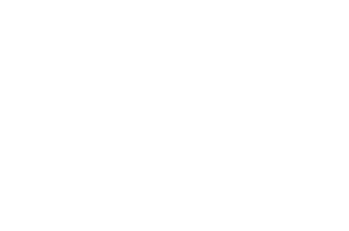

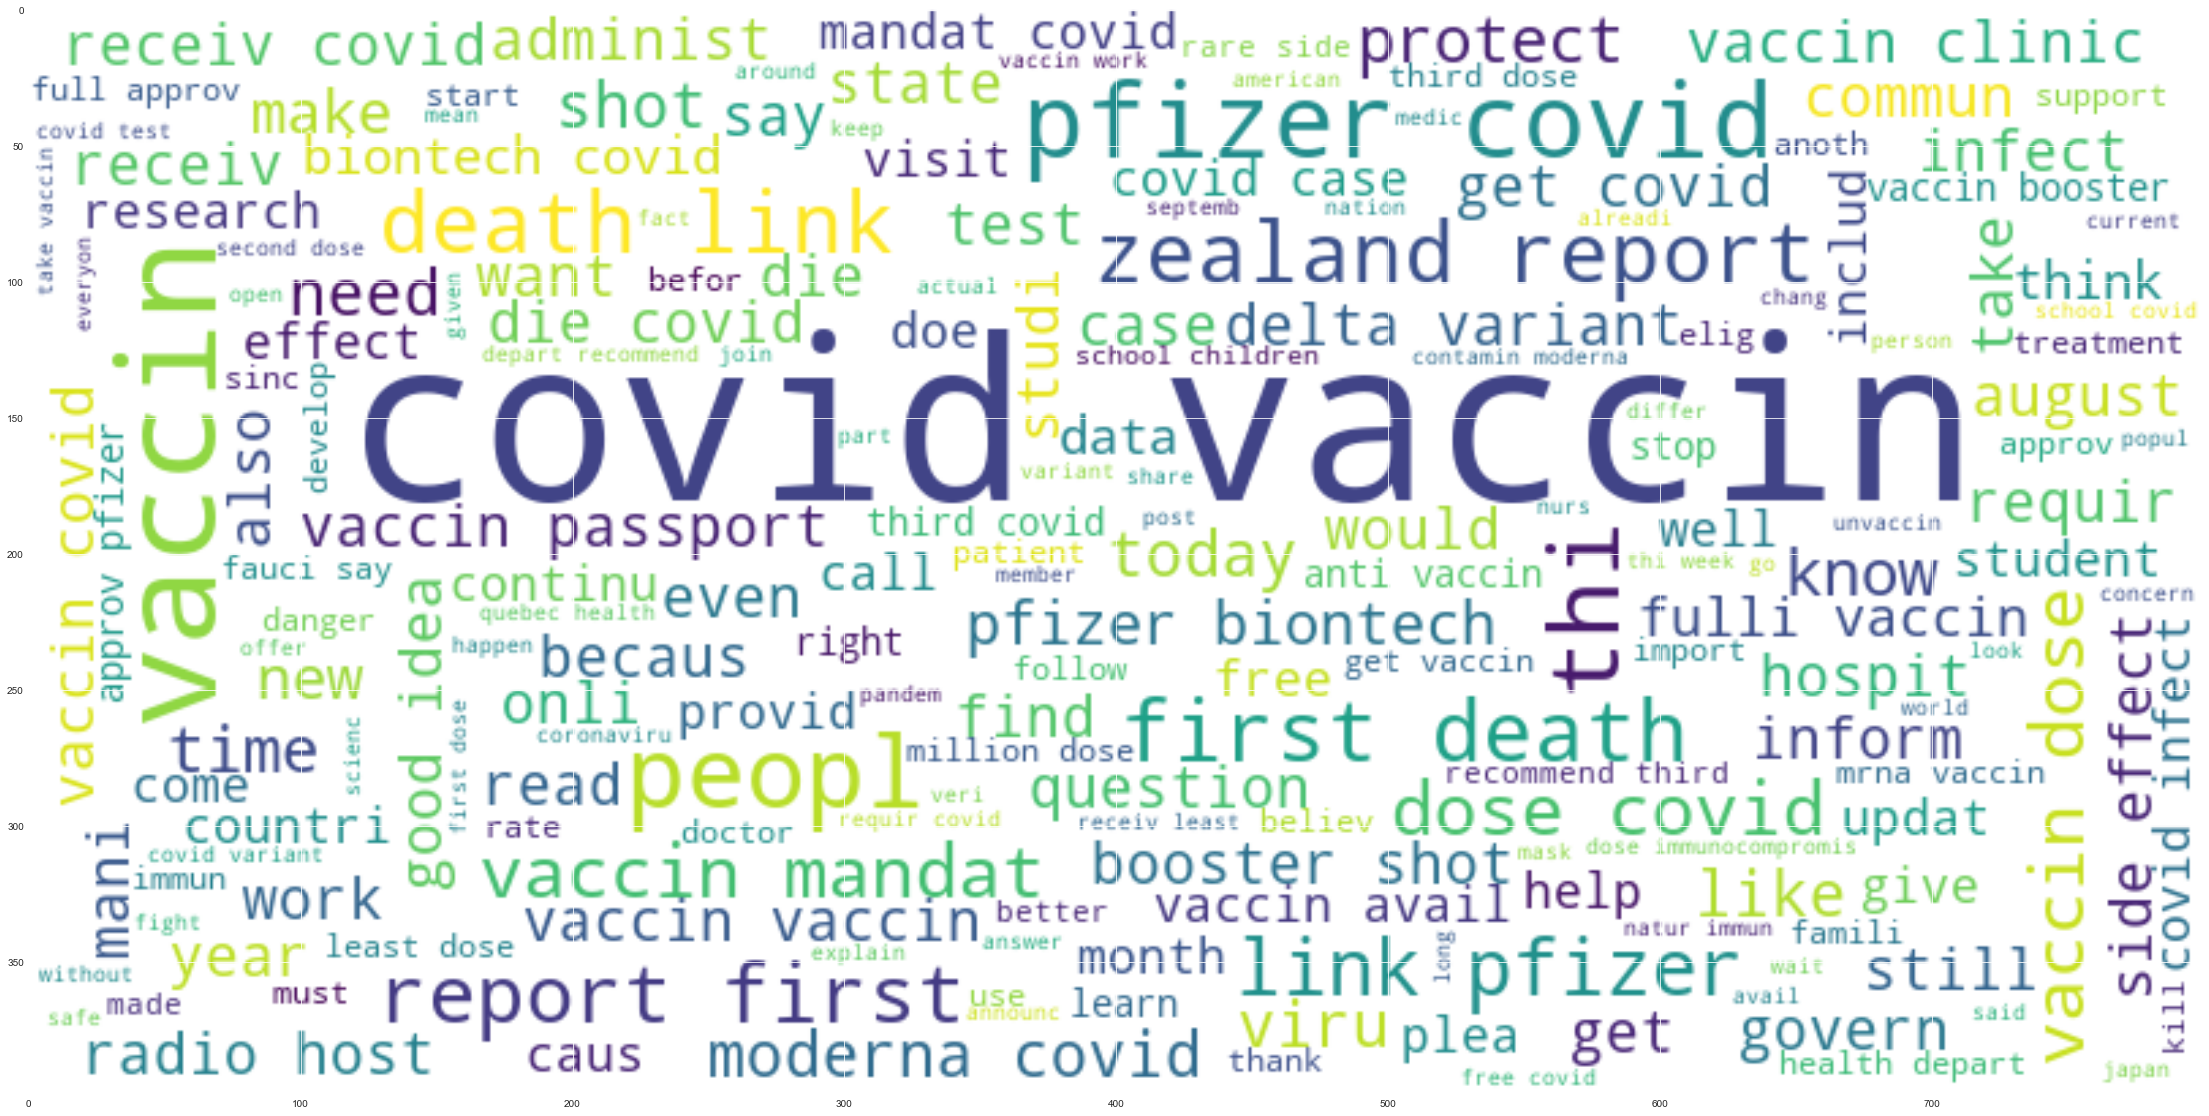

In [22]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()